In [74]:
pwd

'd:\\online class\\DeepLearning\\Object Detection'

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import cv2

import selectivesearch

import numpy as np

In [76]:
img = cv2.imread('test.jpg') #BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

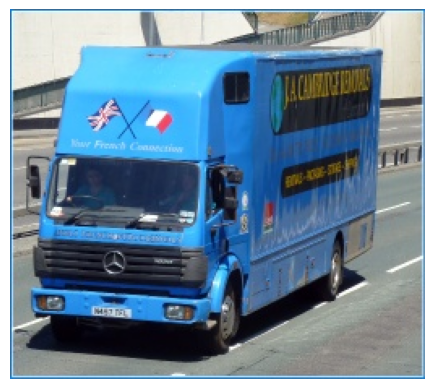

In [77]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [78]:
imgs, regions = selectivesearch.selective_search(img, scale=100, min_size=50)

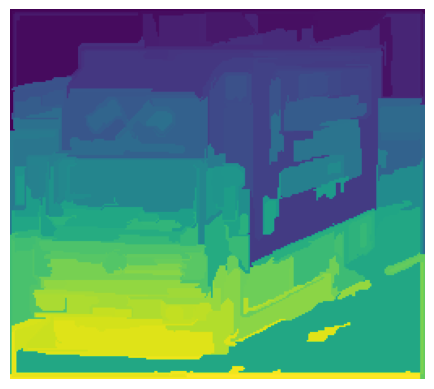

In [79]:
plt.imshow(imgs[:,:,3])
plt.axis('off') 
plt.show()
## harek level ko image ko region ko plot garna lai selective search kun kun region lai select garna lai use gareko xa visualize

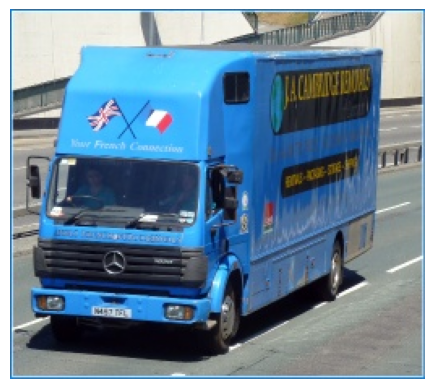

In [80]:
plt.imshow(imgs[:,:,:3] / img[:,:,:3].max()) # normalize garera plot gareko max value le divided garera
plt.axis('off') 
plt.show()

In [81]:
imgs[:,:,:3].max() 

255.0

In [82]:
len(regions) # total regions in the image ie total regions mathi rgb plot gareko image ko without label

400

In [83]:
regions[:10] # first 10 regions ko coordinates

[{'rect': (0, 0, 2, 74), 'size': 100, 'labels': [0.0]},
 {'rect': (3, 0, 85, 0), 'size': 86, 'labels': [1.0]},
 {'rect': (89, 0, 61, 0), 'size': 62, 'labels': [2.0]},
 {'rect': (151, 0, 104, 2), 'size': 108, 'labels': [3.0]},
 {'rect': (1, 1, 1, 47), 'size': 50, 'labels': [4.0]},
 {'rect': (3, 1, 76, 0), 'size': 77, 'labels': [5.0]},
 {'rect': (4, 1, 76, 46), 'size': 2168, 'labels': [6.0]},
 {'rect': (81, 1, 60, 15), 'size': 162, 'labels': [7.0]},
 {'rect': (142, 1, 47, 18), 'size': 433, 'labels': [8.0]},
 {'rect': (152, 1, 77, 19), 'size': 568, 'labels': [9.0]}]

In [84]:
def extract_candidates(img):
    _, regions = selectivesearch.selective_search(img, scale=100, min_size=50)
    candidates = []
    img_area = np.product(img.shape[:2])
    for region in regions:
        if region['size'] < (0.05 * img_area):
            continue
        if region['rect'] in candidates:
            continue
        if region['size'] > img_area:
            continue
        candidates.append(region['rect'])
    return candidates
extract_candidates(img)


C:\Users\uniqu\AppData\Local\Temp\ipykernel_119220\2230612193.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  extract_candidates(img)


[(4, 122, 248, 101),
 (32, 26, 126, 64),
 (144, 26, 84, 157),
 (3, 122, 249, 102),
 (144, 26, 109, 157),
 (26, 26, 132, 65),
 (2, 122, 250, 102),
 (2, 122, 250, 103),
 (144, 26, 110, 157),
 (1, 74, 113, 116),
 (1, 74, 132, 119),
 (1, 74, 146, 119),
 (26, 25, 162, 66),
 (10, 152, 189, 61),
 (144, 26, 110, 161),
 (1, 122, 251, 103),
 (0, 122, 252, 103),
 (38, 1, 191, 72),
 (38, 1, 217, 72),
 (2, 1, 253, 72),
 (0, 0, 255, 74),
 (1, 39, 148, 154),
 (0, 26, 254, 199),
 (0, 0, 255, 91),
 (1, 152, 198, 74),
 (1, 39, 198, 187),
 (0, 0, 255, 115),
 (0, 26, 255, 201),
 (0, 0, 255, 226),
 (0, 0, 255, 227)]

C:\Users\uniqu\AppData\Local\Temp\ipykernel_119220\3731614253.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  for bb in extract_candidates(img):


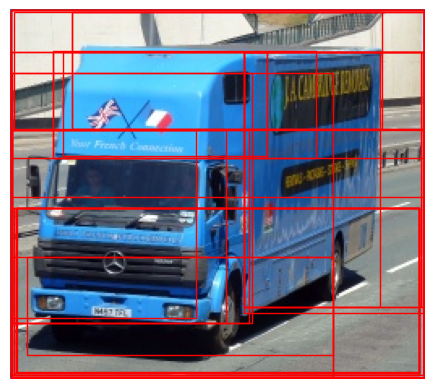

In [92]:
plt.imshow(img)
for bb in extract_candidates(img):
    # Create a rectangle patch using the bounding box coordinates
    # bb[:2] - Top-left corner points, bb[2] and bb[3] - Width and height
    rect = patches.Rectangle(bb[:2], bb[2], bb[3], linewidth=1, edgecolor='r', facecolor='None')
    
    # Add the rectangle patch to the current axes
    plt.gca().add_patch(rect)
plt.axis('off')
plt.show()